<a href="https://colab.research.google.com/github/nimithagopinath/Diabetes-Outcome-Prediction-Linear-vs-Ridge-Regression/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

import pandas as pd
import numpy as np
#plotting
import seaborn as sns
import matplotlib.pyplot as plt
#sklearn
from sklearn.datasets import load_diabetes #importing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
#scipy
from scipy.stats import loguniform



diabetes = datasets.load_diabetes()
ddf = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
ddf["target"] = diabetes.target
ddf.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f25a1012910>],
      dtype=object)

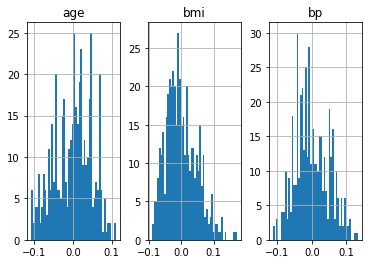

In [ ]:
#PLOTTING THE HISTOGRAM OF AGE, BMI & BP


#ddf.hist(bins=50, figsize=(20,15))
##plt.show()

fig, axes = plt.subplots(1, 3)

ddf.hist('age',bins=50, figsize=(20,15), ax=axes[0])
ddf.hist('bmi', bins=50, figsize=(20,15), ax=axes[1])
ddf.hist('bp', bins=50, figsize=(20,15), ax=axes[2])



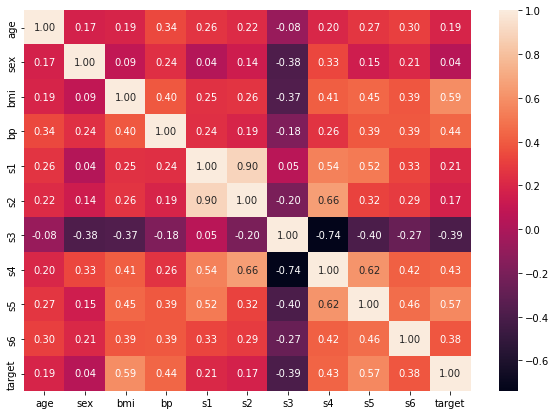

In [ ]:
# CORRRELATION

#figure size
plt.figure(figsize=(10, 7))
#correlation matrix
dataplot = sns.heatmap(ddf.corr(), annot=True, fmt='.2f')

In [ ]:
# RANDOM SAMPLING



#defining features
X = ddf.iloc[:,:-1]
#defining label
y = ddf['target']

#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)





Target values for the samples are: 
 [143.06621271 177.70923973 134.80159283 288.66523611 123.58429291
  96.64399491 252.70865552 183.51563317  93.96508916 109.83316004
  98.04648824 168.61502622  58.09759262 206.5896178  102.4078438
 130.25693511 218.0570909  245.9207401  193.24351477 214.36945188
 208.82778064  90.55665059  74.15304744 187.1216387  156.36442036
 157.46376883 184.17736744 177.18027887  52.24263585 110.66673778
 174.05918425  90.89850309 133.07968763 183.22988596 173.93725211
 189.85248233 125.86458581 121.53390004 148.94895292  60.82842472
  76.36312191 106.40220555 162.20473499 153.15077269 174.23003255]

Target values for the first two samples are: 
 [143.06621271 177.70923973]


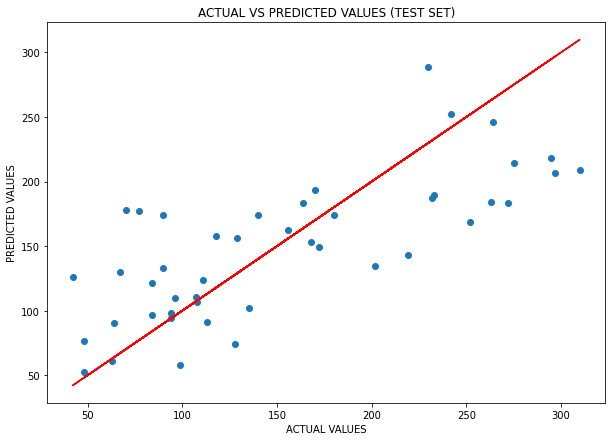

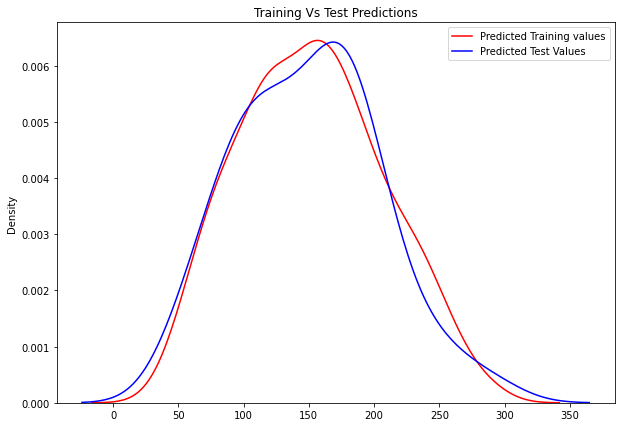

In [ ]:
# LINEAR REGRESSION

#fitting the model
model = LinearRegression().fit(X_train, y_train)

#predictions
y_test_pred =model.predict(X_test)
y_train_pred = model.predict(X_train)


print('\nTarget values for the samples are: \n',y_test_pred)
#accuracy1 = accuracy_score(y_test_pred,y_test)            #now we check the accuracy of the algorithm.
#print('\nThe accuracy of the Decision Tree Classifier is:',accuracy1)

y_test_pred_output = y_test_pred[:2]

print('\nTarget values for the first two samples are: \n',y_test_pred_output)



#Predict the target value for two samples of the testing set.

plt.figure(figsize=(10, 7))
#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color='r')
#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
#showig plot
plt.show()



# To check overfitting

#image dimensions
plt.figure(figsize=(10, 7))
#Kernel Density Estimation plot
ax = sns.kdeplot(y_train_pred, color="r", label="Predicted Training values") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Test Values", ax=ax) #predicted values
#showing title
plt.title('Training Vs Test Predictions')
#showing legend
plt.legend()
#showing plot
plt.show()



In [ ]:
#model metrics
print(f'The mean absolute error for test set is:{metrics.mean_absolute_error(y_test, y_test_pred): .2f}')
print(f'The root mean squared error for test set is:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)): .2f}')

print(f'The mean absolute error for train set is:{metrics.mean_absolute_error(y_train, y_train_pred): .2f}')
print(f'The root mean squared error for train set is:{np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)): .2f}')

The mean absolute error for test set is: 41.58
The root mean squared error for test set is: 52.38
The mean absolute error for train set is: 43.43
The root mean squared error for train set is: 53.67


Predicted values  287    157.59
211    153.87
72     156.65
dtype: float64
Real values       287    219.0
211     70.0
72     202.0
Name: target, dtype: float64
Trained W         12.66
Trained b         153.51


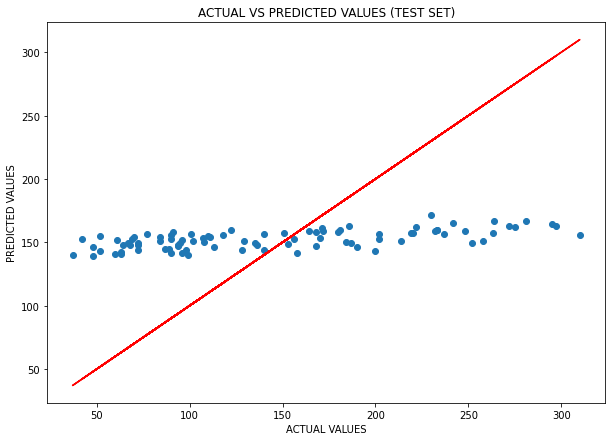

The mean absolute error of test set is: 60.05
The root mean squared error of test set is: 68.79
The mean absolute error for train set is: 62.80
The root mean squared error for train set is: 73.51


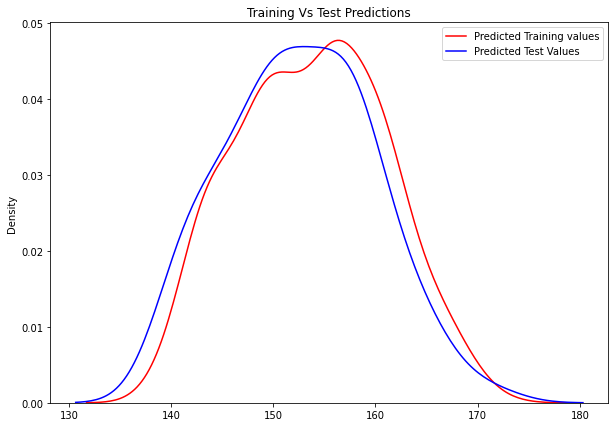

In [ ]:
# MODEL 2 - RIDGE REGRESSION

# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

# Importing libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Ridge Regression

class RidgeRegression() :

    def __init__( self, learning_rate, iterations, l2_penality ) :

        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_penality = l2_penality

    # Function for model training
    def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape

        # weight initialization
        self.W = np.zeros( self.n )

        self.b = 0
        self.X = X
        self.Y = Y

        # gradient descent learning

        for i in range( self.iterations ) :
            self.update_weights()
        return self

    # Helper function to update weights in gradient descent

    def update_weights( self ) :
        Y_pred = self.predict( self.X )

        # calculate gradients
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +
               ( 2 * self.l2_penality * self.W ) ) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m

        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self

    # Hypothetical function  h( x )
    def predict( self, X ) :
        return X.dot( self.W ) + self.b

# Driver code

def main() :

    X = ddf.iloc[:,:-1]
  #defining label
    y = ddf['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    # Model training
    model = RidgeRegression( iterations = 1000,
                            learning_rate = 0.01, l2_penality = 1 )
    model.fit( X_train, y_train )

    # Prediction on test set
    y_test_pred =model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print( "Predicted values ", np.round( y_test_pred[:3], 2 ) )
    print( "Real values      ", y_test[:3] )
    print( "Trained W        ", round( model.W[0], 2 ) )
    print( "Trained b        ", round( model.b, 2 ) )

    #Predict the target value for two samples of the testing set.

    plt.figure(figsize=(10, 7))
#scatterplot of y_test and y_test_pred
    plt.scatter(y_test, y_test_pred)
    plt.plot(y_test, y_test, color='r')
#labeling
    plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
    plt.xlabel('ACTUAL VALUES')
    plt.ylabel('PREDICTED VALUES')
#showig plot
    plt.show()


#model metrics
    print(f'The mean absolute error of test set is:{metrics.mean_absolute_error(y_test, y_test_pred): .2f}')
    print(f'The root mean squared error of test set is:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)): .2f}')

    print(f'The mean absolute error for train set is:{metrics.mean_absolute_error(y_train, y_train_pred): .2f}')
    print(f'The root mean squared error for train set is:{np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)): .2f}')

# To check overfitting



#image dimensions
    plt.figure(figsize=(10, 7))
#Kernel Density Estimation plot
    ax = sns.kdeplot(y_train_pred, color="r", label="Predicted Training values") #actual values
    sns.kdeplot(y_test_pred, color="b", label="Predicted Test Values", ax=ax) #predicted values
#showing title
    plt.title('Training Vs Test Predictions')
#showing legend
    plt.legend()
#showing plot
    plt.show()

if __name__ == "__main__" :
    main()